In [16]:
import numpy as np
from open3d import *
import matplotlib.pyplot as plt

In [55]:
# We follow the convention K = [[fx, 0, cx], [0, fy, cy], [0, 0, 1]]
# Rt = [[R | t], [0, 0, 0, 1]]
# where the final projection matrix is P = K * Rt

K = np.array([[256.0, 0.0, 0], [0.0, 256.0, 0], [0.0, 0.0, 1.0]])

Rt = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]])

P = np.dot(K, Rt)

print(P)


[[256.   0.   0.   0.]
 [  0. 256.   0.   0.]
 [  0.   0.   1.   0.]]


In [56]:
point_cloud = io.read_point_cloud("../assets/Truck/sparse_pc.ply") # Read point cloud
point_cloud_array = np.asarray(point_cloud.points)
point_cloud_colors = np.asarray(point_cloud.colors)

# add one last 0 to the point_cloud array
point_cloud_array_homogeneous = np.hstack((point_cloud_array, np.ones((point_cloud_array.shape[0], 1))))


In [57]:
point_cloud_array_homogeneous

array([[  2.312886,   1.203826,  -1.142459,   1.      ],
       [  2.632269,   0.796376,  -1.175541,   1.      ],
       [  2.21405 ,   0.494482,  -1.209522,   1.      ],
       ...,
       [-17.14724 ,  15.016958,   0.18957 ,   1.      ],
       [ -1.914546,   1.305833,  -0.447519,   1.      ],
       [  0.973634,  -1.134099,  -0.512201,   1.      ]])

In [58]:
point_2d = np.dot(P, point_cloud_array_homogeneous.T).T
print(point_2d)

[[ 5.92098816e+02  3.08179456e+02 -1.14245900e+00]
 [ 6.73860864e+02  2.03872256e+02 -1.17554100e+00]
 [ 5.66796800e+02  1.26587392e+02 -1.20952200e+00]
 ...
 [-4.38969344e+03  3.84434125e+03  1.89570000e-01]
 [-4.90123776e+02  3.34293248e+02 -4.47519000e-01]
 [ 2.49250304e+02 -2.90329344e+02 -5.12201000e-01]]


In [59]:
point_2d = point_2d / point_2d[:, 2].reshape(-1, 1)
print(point_2d)

[[-5.18267015e+02 -2.69750999e+02  1.00000000e+00]
 [-5.73234676e+02 -1.73428452e+02  1.00000000e+00]
 [-4.68612229e+02 -1.04659024e+02  1.00000000e+00]
 ...
 [-2.31560555e+04  2.02792702e+04  1.00000000e+00]
 [ 1.09520216e+03 -7.46992302e+02  1.00000000e+00]
 [-4.86625961e+02  5.66826976e+02  1.00000000e+00]]


In [60]:
normalize_0_1 = (point_2d[:, :2]) / K[0,0]
normalize_0_1

array([[ -2.02448053,  -1.05371484],
       [ -2.23919795,  -0.67745489],
       [ -1.83051652,  -0.40882431],
       ...,
       [-90.45334177,  79.21589914],
       [  4.27813344,  -2.91793868],
       [ -1.90088266,   2.21416788]])

In [63]:
# remove points that are outside the image

mask = (normalize_0_1[:, 0] >= 0) & (normalize_0_1[:, 0] <= 1) & (normalize_0_1[:, 1] >= 0) & (normalize_0_1[:, 1] <= 1)
normalize_0_1 = normalize_0_1[mask]

# plot this points on a 256x256 image
image = np.zeros((256, 256, 3), dtype=np.uint8)

x = (normalize_0_1[:,0] * 255).astype(int)
y = (normalize_0_1[:,1] * 255).astype(int)

image[y, x] = (255, 255, 255)

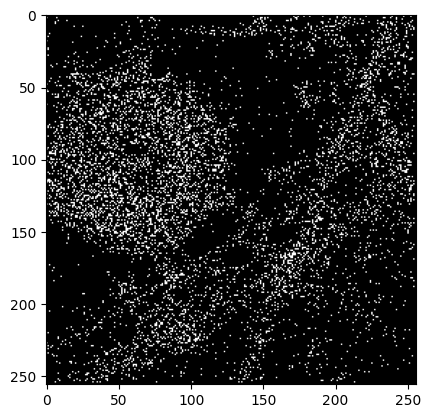

In [64]:
plt.imshow(image)

In [36]:
# simple examples

simple_array = np.array([[100, 100, 100], [0,0,100], [100, 0, 100], [0, 100, 100]])
simple_array_homogeneous = np.hstack((simple_array, np.ones((simple_array.shape[0], 1))))


In [39]:
point_2d = np.dot(P, simple_array_homogeneous.T).T
point_2d = point_2d / point_2d[:, 2].reshape(-1, 1)
point_2d

array([[10., 10.,  1.],
       [ 0.,  0.,  1.],
       [10.,  0.,  1.],
       [ 0., 10.,  1.]])

In [41]:
# normalize interval from -1 to 1
normalize_2d = (point_2d[:, :2] - (K[0,0]/2)) / (K[0,0]/2)
normalize_2d   

array([[ 1.,  1.],
       [-1., -1.],
       [ 1., -1.],
       [-1.,  1.]])

In [44]:
normalize_0_1 = (point_2d[:, :2]) / K[0,0]
normalize_0_1

array([[1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.]])

In [42]:
# plot this points on a 256x256 image
image = np.zeros((256, 256, 3), dtype=np.uint8)
    

In [52]:
x = (normalize_0_1[:,0] * 255).astype(int)
y = (normalize_0_1[:,1] * 255).astype(int)

In [53]:
image[y, x] = (255, 255, 255)

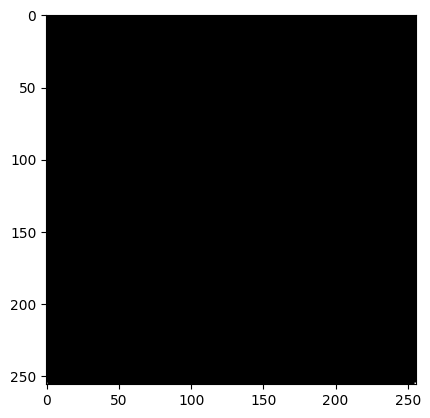

In [54]:
plt.imshow(image)